In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
#Label images
training_image_directory = './smoker_dataset/Training/Training'
validation_image_directory = './smoker_dataset/Validation/Validation'
Y_train = []
Y_validation = []
#label training images
for filename in os.listdir(training_image_directory):
    if filename[0] == 'n':
        Y_train.append('0')
    else:
        Y_train.append('1')
#label validation images
for filename in os.listdir(validation_image_directory):
    if filename[0] == 'n':
        Y_validation.append('0')
    else:
        Y_validation.append('1')


In [3]:
# Test label
print(Y_train)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [4]:
# Specify the directory containing your images
image_directory = './smoker_dataset/Training/Training'

# List to store images
images = []

# Loop through all files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):  # Assuming all images are in JPG format
        # Construct the full path to the image
        image_path = os.path.join(image_directory, filename)
        
        # Read the image and append it to the list
        img = cv2.imread(image_path)
        images.append(img)

# Now, the 'images' list contains all your images

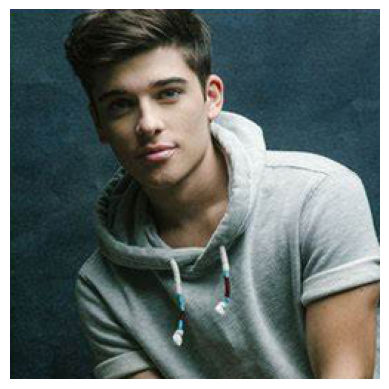

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image
image_path = './smoker_dataset/Training/Training/'
image_name = 'notsmoking_0002.jpg'
# Load the image using Matplotlib
img = mpimg.imread(image_path+image_name)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
#Check shape of images
# print(images[0])
print(len(Y_validation))
image_array = np.array(images)
print(image_array.shape[1:])

180
(250, 250, 3)


In [7]:
validation_image_directory = './smoker_dataset/Validation/Validation'

# List to store images
validationImages = []

# Loop through all files in the directory
for filename in os.listdir(validation_image_directory):
    if filename.endswith(".jpg"):  # Assuming all images are in JPG format
        # Construct the full path to the image
        image_path = os.path.join(validation_image_directory, filename)
        
        # Read the image and append it to the list
        img = cv2.imread(image_path)
        validationImages.append(img)

# Now, the 'images' list contains all your images

In [8]:
training_image_directory = './smoker_dataset/Training/Training'

# List to store images
train_file_name = []

# Loop through all files in the directory
for filename in os.listdir(training_image_directory):
    if filename.endswith(".jpg"):  # Assuming all images are in JPG format
        train_file_name.append(filename)

In [9]:
validation_image_directory = './smoker_dataset/Validation/Validation'

# List to store images
validation_file_name = []

# Loop through all files in the directory
for filename in os.listdir(validation_image_directory):
    if filename.endswith(".jpg"):  # Assuming all images are in JPG format
        validation_file_name.append(filename)

In [12]:
#Hyper parameter
DROPOUT_RATE = 0.2
EPOCHS = 10
BATCH_SIZE = 32

In [15]:
# Define your number of classes
num_classes = 2  # Adjust this based on your specific classification task

# Load the pre-trained ResNet-50 model (excluding the top classification layer)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=image_array.shape[1:])

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add my own classification layers on top
last_layer = base_model.output #output layer
# x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten(name='flatten')(last_layer)
x = tf.keras.layers.Dropout(DROPOUT_RATE)(x)
x = Dense(2048, activation='relu', name='fc6')(x)
x = tf.keras.layers.Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation='relu', name='fc7')(x)
x = tf.keras.layers.Dropout(DROPOUT_RATE)(x)

predictions = Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load your dataset using ImageDataGenerator
# Specify your data directory, target size, batch size, etc.
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load your images using flow_from_directory for training set
train_generator = train_datagen.flow_from_directory(
    directory = './divided_smoker_dataset/Training/',
    target_size=(250, 250),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

# Load your images using flow_from_directory for training set
validation_generator = test_datagen.flow_from_directory(
    directory = './divided_smoker_dataset/Validation/',
    target_size=(250, 250),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)

# Train the model
model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

# Save the fine-tuned model
model.save('fine_tuned_resnet50v2.h5')

94668760/94668760 [==============================] - 7s 0us/step
Found 716 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Class Labels: ['nonsmoke', 'smoke']
Epoch 1/10
23/23 [==============================] - 234s 10s/step - loss: 29.6072 - accuracy: 0.5754 - val_loss: 1.7696 - val_accuracy: 0.8500
Epoch 2/10
23/23 [==============================] - 224s 10s/step - loss: 1.9282 - accuracy: 0.8142 - val_loss: 0.8612 - val_accuracy: 0.8944
Epoch 3/10
23/23 [==============================] - 227s 10s/step - loss: 0.9062 - accuracy: 0.8743 - val_loss: 0.6431 - val_accuracy: 0.9111
Epoch 4/10
23/23 [==============================] - 241s 10s/step - loss: 0.7319 - accuracy: 0.8980 - val_loss: 0.3272 - val_accuracy: 0.9444
Epoch 5/10
23/23 [==============================] - 191s 8s/step - loss: 0.4768 - accuracy: 0.9148 - val_loss: 0.4296 - val_accuracy: 0.9167
Epoch 6/10
23/23 [==============================] - 123s 5s/step - loss: 0.5385 - accuracy: 0.9288 - val_lo

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Continue training model
# Load the previously saved model
model = load_model('fine_tuned_resnet50v2.h5')

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_df = pd.DataFrame({'filename': train_file_name, 'label': Y_train})
validation_df = pd.DataFrame({'filename': validation_file_name, 'label': Y_validation})

# Load your images using flow_from_dataframe for training set
train_generator = train_datagen.flow_from_directory(
    directory = './divided_smoker_dataset/Training/',
    target_size=(250, 250),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

# Load your images using flow_from_dataframe for validation set
validation_generator = test_datagen.flow_from_directory(
    directory = './divided_smoker_dataset/Validation/',
    target_size=(250, 250),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

# Continue training the model
model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

# Save the model after additional training
model.save('fine_tuned_resnet50v2.h5')

Found 716 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Epoch 1/10
23/23 [==============================] - 126s 5s/step - loss: 0.1663 - accuracy: 0.9707 - val_loss: 0.9113 - val_accuracy: 0.9222
Epoch 2/10
23/23 [==============================] - 110s 5s/step - loss: 0.3172 - accuracy: 0.9595 - val_loss: 0.6445 - val_accuracy: 0.9222
Epoch 3/10
23/23 [==============================] - 113s 5s/step - loss: 0.2109 - accuracy: 0.9721 - val_loss: 0.9632 - val_accuracy: 0.9278
Epoch 4/10
23/23 [==============================] - 134s 6s/step - loss: 0.3712 - accuracy: 0.9679 - val_loss: 0.6736 - val_accuracy: 0.9222
Epoch 5/10
23/23 [==============================] - 100s 4s/step - loss: 0.1529 - accuracy: 0.9804 - val_loss: 0.9576 - val_accuracy: 0.9056
Epoch 6/10
23/23 [==============================] - 110s 5s/step - loss: 0.2411 - accuracy: 0.9679 - val_loss: 0.5397 - val_accuracy: 0.9389
Epoch 7/10
23/23 [==============================] - 106s 5s/step - loss:

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
#test the model
# Load the trained model
model = load_model('fine_tuned_resnet50v2.h5')

# Assuming you have a test generator similar to the training generator
test_generator = test_datagen.flow_from_directory(
    directory = './divided_smoker_dataset/Testing/',
    target_size=(250, 250),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Evaluate the model on the test set
evaluation_result = model.evaluate(test_generator)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

Found 224 images belonging to 2 classes.
7/7 [==============================] - 14s 2s/step - loss: 0.2296 - accuracy: 0.9509
Test Loss: 0.22964945435523987
Test Accuracy: 0.9508928656578064
